# Support Vector Machine with Boston Housing Dataset


Description of the dataset: 

Boston dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.
In total, there are 506 instances (rows) and each has 14 attributes (columns). Target variable is`MEDV` or *Median value of owner-occupied homes in $1000's*with the other 13 being corresponding values like: per capita crime rate by town, proportion of non-retail business acres per town, and average number of rooms per dwelling.

In [39]:
## TODO: About the algorithm

## 1. Loading the Data

In [40]:
# !pip install keras # TODO: update Dockerfile 

In [41]:
#Load Boston Dataset

from keras.datasets import boston_housing
(X_train,y_train), (X_test,y_test)= boston_housing.load_data()


In [42]:
print("Shape of training dataset :" , X_train.shape);
print("--------------------------------------")
print("Shape of testing dataset:", X_test.shape)

Shape of training dataset : (404, 13)
--------------------------------------
Shape of testing dataset: (102, 13)


## 2. Fit XGBoost Regression Model




In [43]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)

xg_reg = xgb.XGBRegressor(
    objective ='reg:squarederror', 
    colsample_bytree = 0.3, 
    learning_rate = 0.5,
    max_depth = 5, 
    alpha = 10,
    n_estimators = 25)


xg_reg.fit(X_train, y_train)

y_pred = xg_reg.predict(X_test)

## 3. Performance 

In [44]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [45]:
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2 = round(r2_score(y_test, y_pred),2)

print("The model performance for training set")
print("--------------------------------------")
print("Root Mean Squared Error: {}".format(rmse))
print("R^2: {}".format(r2))
print("\n")

The model performance for training set
--------------------------------------
Root Mean Squared Error: 4.22
R^2: 0.79




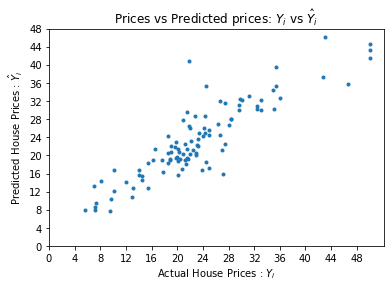

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
# scatter actual and predicted results
plt.xlabel("True price")
plt.ylabel("Predicted price")

plt.scatter(y_test, y_pred, marker='.')
plt.xticks(range(0, int(max(y_test)),4))
plt.yticks(range(0, int(max(y_test)),4))
plt.xlabel("Actual House Prices : $Y_i$")
plt.ylabel("Predicted House Prices : $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

plt.show()